# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude

from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather"
api_key = weather_api_key
units = "metric"

url = f"{base_url}?appid={api_key}&units={units}&q="
url

'http://api.openweathermap.org/data/2.5/weather?appid=7fce4b8a5e53bbdfac7793fb0c76f83b&units=metric&q='

In [4]:
from pprint import pprint

In [5]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url} + {city}"
    response = requests.get(city_url).json()
    #pprint(response, indent=4, sort_dicts=True)

     # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response['weather'][0]['description']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | stanley


Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | la rinconada
Processing Record 9 of Set 1 | port blair
Processing Record 10 of Set 1 | praia da vitoria
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | haiku-pauwela
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | vadso
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | afaahiti
Processing Record 18 of Set 1 | ola
Processing Record 19 of Set 1 | beipiao
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | constitucion
Processing Record 22 of Set 1 | torghay
Processing Record 23 of Set 1 | san luis de la loma
City not found. Skipping...
Processing Record 24 of Set 1 | talnakh
Processing Record 25 of Set 1 | whitehorse
Processing Record 26 of Set 1 | puerto natales
Processing Record 27 of Set 1 | college
Processing Record 28 of Set 1 | kutu

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          511
Lat           511
Lng           511
Max Temp      511
Humidity      511
Cloudiness    511
Wind Speed    511
Country       511
Date          511
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,7.68,53,18,4.48,NZ,1715070449
1,port-aux-francais,-49.3500,70.2167,6.27,82,71,14.20,TF,1715070450
2,adamstown,-25.0660,-130.1015,21.76,78,73,7.83,PN,1715070450
3,albany,42.6526,-73.7562,12.52,74,0,0.45,US,1715070450
4,stanley,54.8680,-1.6985,10.77,92,75,2.57,GB,1715070450


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,7.68,53,18,4.48,NZ,1715070449
1,port-aux-francais,-49.3500,70.2167,6.27,82,71,14.20,TF,1715070450
2,adamstown,-25.0660,-130.1015,21.76,78,73,7.83,PN,1715070450
3,albany,42.6526,-73.7562,12.52,74,0,0.45,US,1715070450
4,stanley,54.8680,-1.6985,10.77,92,75,2.57,GB,1715070450


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

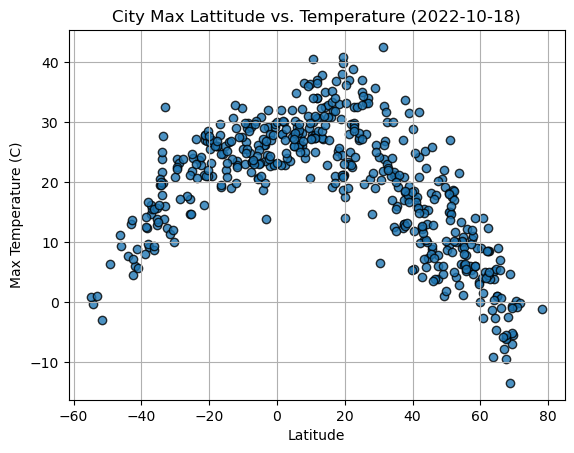

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Lattitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

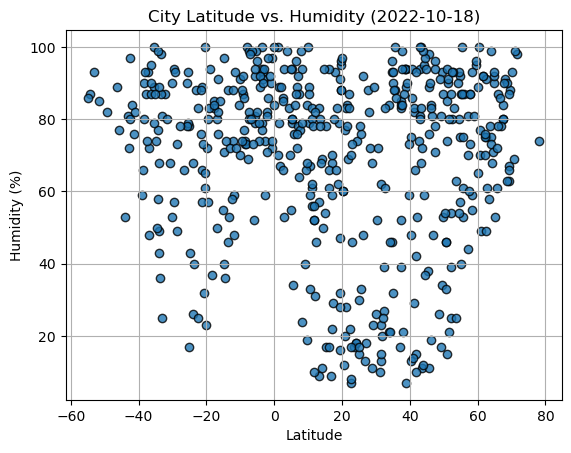

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

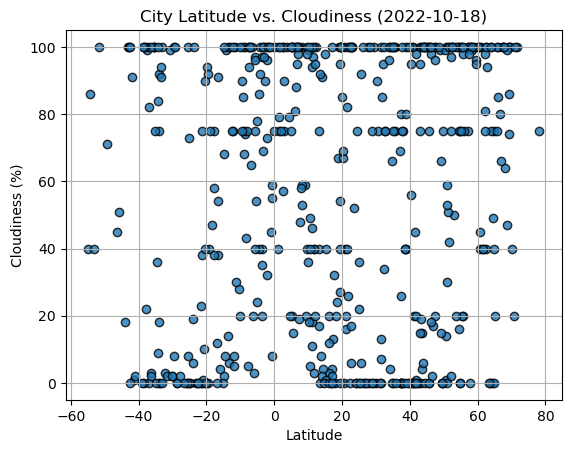

In [13]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

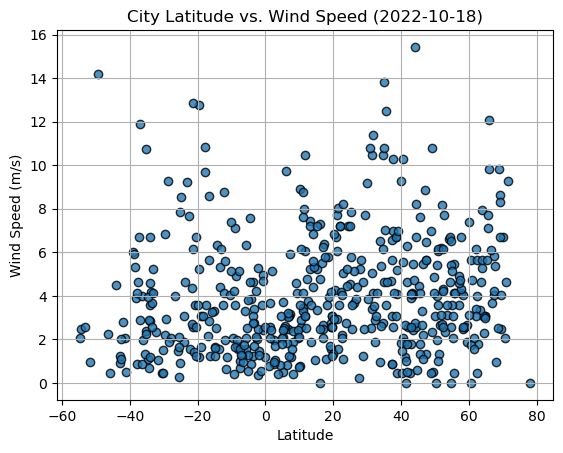

In [14]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

def plot_linear_regression(x, y, x_label, y_label):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,albany,42.6526,-73.7562,12.52,74,0,0.45,US,1715070450
4,stanley,54.8680,-1.6985,10.77,92,75,2.57,GB,1715070450
5,longyearbyen,78.2186,15.6401,-1.09,74,75,0.00,SJ,1715070450
6,hilo,19.7297,-155.0900,21.25,95,100,3.09,US,1715070325
7,la rinconada,37.4873,-5.9826,20.80,52,0,3.09,ES,1715070451


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,7.68,53,18,4.48,NZ,1715070449
1,port-aux-francais,-49.3500,70.2167,6.27,82,71,14.20,TF,1715070450
2,adamstown,-25.0660,-130.1015,21.76,78,73,7.83,PN,1715070450
10,grytviken,-54.2811,-36.5092,-0.39,87,86,2.48,GS,1715070451
12,blackmans bay,-43.0167,147.3167,13.07,81,100,0.93,AU,1715070452


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8427973846000818


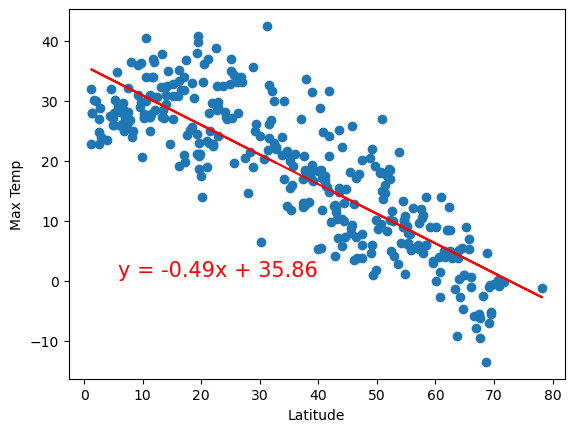

In [18]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.xlabel('Latitude')
plt.ylabel('Max Temp');

The r-value is: 0.7667741481842113


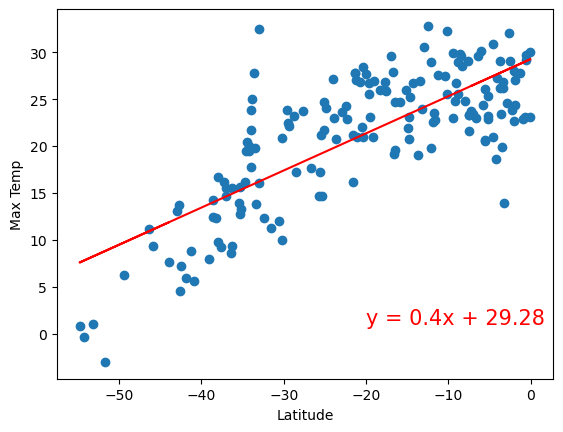

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,1),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.xlabel('Latitude')
plt.ylabel('Max Temp');

**Discussion about the linear relationship:** 

As we look at our first linear regression plot for Northern Hemisphere, we can see that there is a strong negative relationshop between latitude and maximum temperature. With an r-value of -0.842 we can suggest that as one moves towards higher latitudes, temperature decresases.

With the findings in our Southern Hemisphere, we see a strong positive correlation with an r-value of 0.766. This suggests that as we move toward the equator (lattitude increasing) maximum temperatures also increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1311887209235425


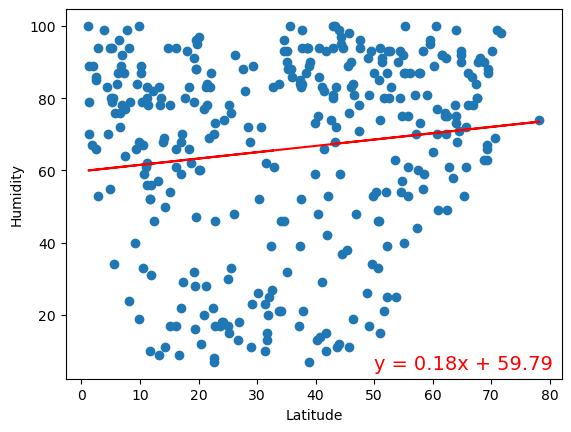

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,5),fontsize=14,color="red")
print(f"The r-value is: {rvalue}")
plt.xlabel('Latitude')
plt.ylabel('Humidity');

The r-value is: 0.10745751725371085


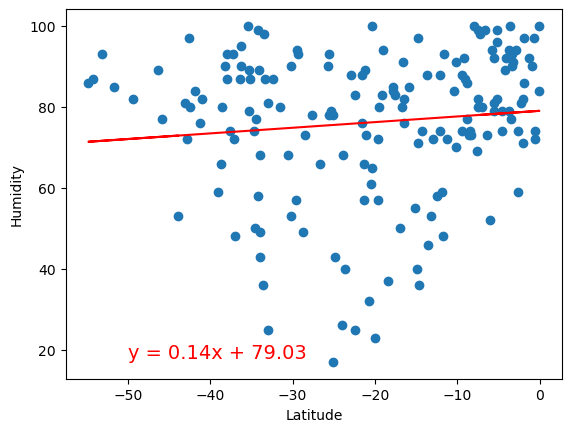

In [37]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,18),fontsize=14,color="red")
print(f"The r-value is: {rvalue}")
plt.xlabel('Latitude')
plt.ylabel('Humidity');

**Discussion about the linear relationship:** 
For the Northern hemishphere relation between lattitude and humidity, we are seeing a weak positive correlation of 0.131. This is suggesting that as lattitude increases, humidity slightly increases but the relationship is not very strong. 

For the Southern hemisphere relation we are seeing a similar trend. With an r-value of 0.107, it's clear to say that as lattidue increases, humidity slightly increaes but the relationship isn't very strong.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09730882257053731


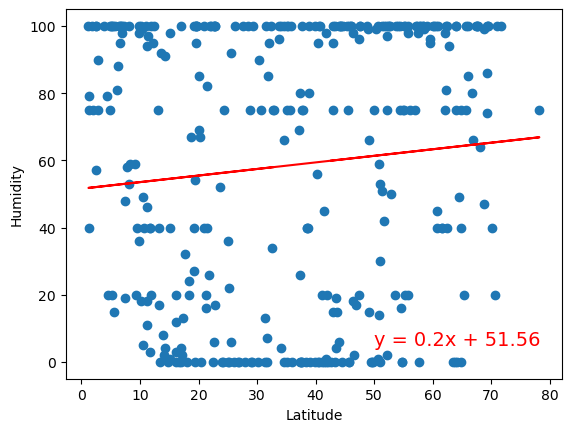

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,5),fontsize=14,color="red")
print(f"The r-value is: {rvalue}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness');

The r-value is: 0.15743222703878038


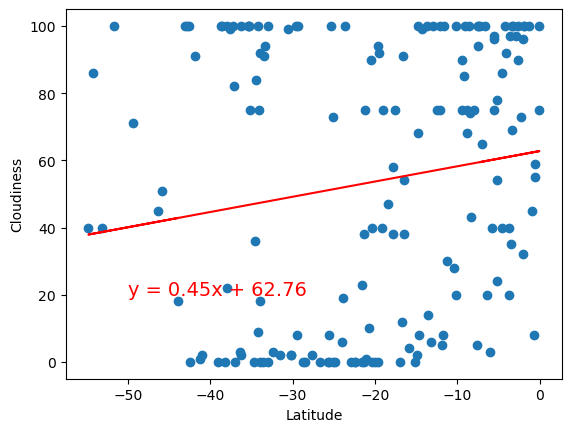

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=14,color="red")
print(f"The r-value is: {rvalue}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness');

**Discussion about the linear relationship:** 
For both the Northern & Southern hemishpere we are seeing a weak relationship between latitude and cloudiness with Northern having an r value of 0.097 and southern having 0.157. These are weak positive relationships showing that there is a slight positive trend as latitude increases leading to an increase cloudiness, but it is not strong enough to make accurate predicitions. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.12386150818481925


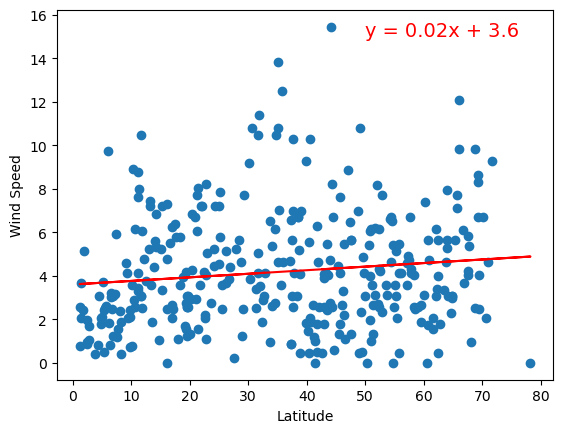

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=14,color="red")
print(f"The r-value is: {rvalue}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed');

The r-value is: -0.06909454648351776


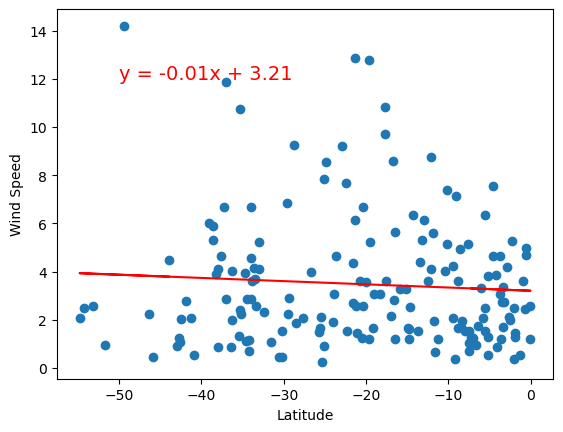

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=14,color="red")
print(f"The r-value is: {rvalue}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed');

**Discussion about the linear relationship:** 
For both northern and southern hemisphere we are seeing weak correlations between latitude and windspeed. 

For the Northern Hemisphere, our r-value is 0.123 showing a weak positive relationship between latitude and windspeed. This shows a slight connection as latitude increases, windspeed slightly increases as well.

For the Southern Hemisphere, our r-value is -0.069 indicating a weak negative correlation between latitude and windspeed. This shows a slight connection as latitude increases, windspeed decreases.